<a href="https://colab.research.google.com/github/merkington/horror/blob/main/Directors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

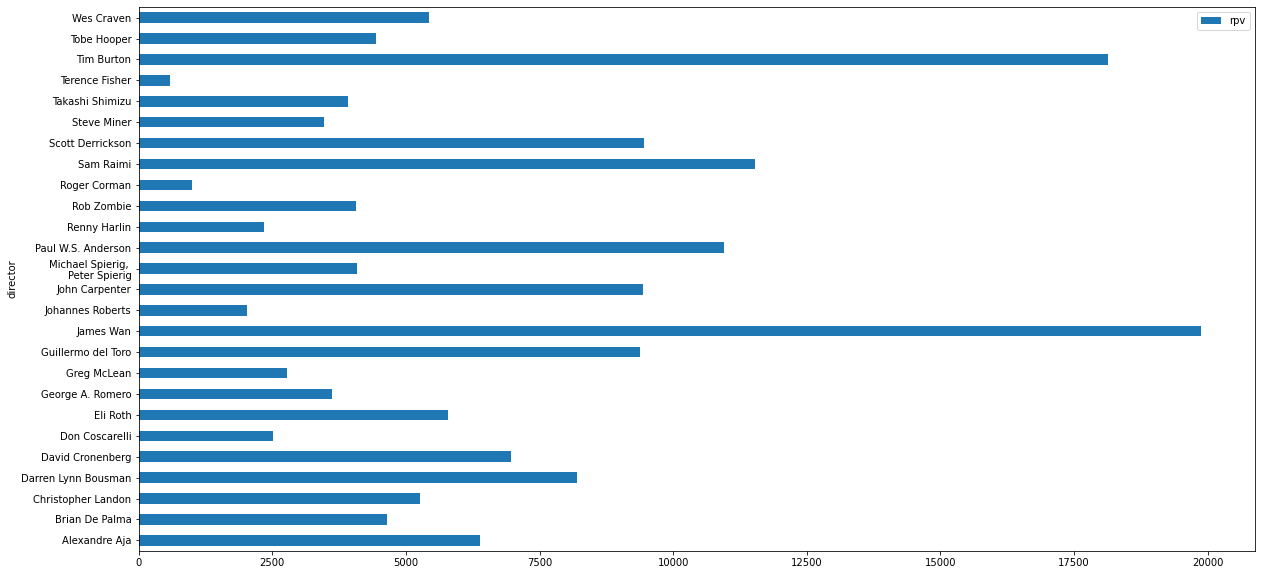

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
# shows most popular for horror on imdb (rating* votes) / runtime qcontrol
# written more orderly but probably wrongly ha.
# read the horror dataset from a URL
url = "https://raw.githubusercontent.com/merkington/fffff/main/horror.csv"
horror = pd.read_csv(url)

# drop any rows with missing values
horror = horror.dropna()

# remove "min" from each value in the runtime column and convert to int
horror.loc[:, 'runtime'] = horror['runtime'].str.replace("min", "").astype(int)

# Count the number of films made by each director
dcount = horror['director'].value_counts()

# Create a new column indicating whether each row meets the condition
horror.loc[:, 'director_count'] = horror['director'].isin(dcount[dcount > 3].index)
rpv = (horror['rating'] * horror['votes']) / horror['runtime']

horror.loc[:, 'rpv'] = rpv

# Filter the dataframe by rows where the director has more than 5 films
subs = horror.loc[horror['director_count'] == True , ['year', 'director', 'rpv']]

# Create a pivot table with year range, director, and rpv as the columns
pivot_table = pd.pivot_table(subs, values='rpv', index=['director'])

# Plot a stacked horizontal bar chart with year range stacked on the bars
pivot_table.plot(kind='barh', figsize=(20, 10))

plt.show()
